In [2]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import cv2
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
path='../raw_data/part1/part1/32_1_0_20170103183219410.jpg'

In [25]:
image=cv2.imread(path)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

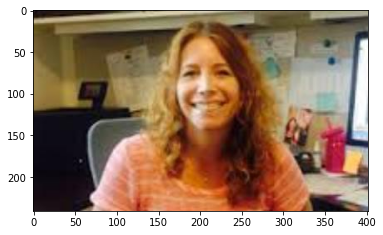

In [58]:
plt.imshow(image)

In [27]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(image=image,scaleFactor=1.3, minNeighbors=3, minSize=(30, 30))

len(faces)

1

In [28]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0),1)
    out_image = image[y:y + h, x:x + w]

In [29]:
desire_size=48

In [30]:
out_image=cv2.resize(out_image, dsize=(desire_size, desire_size), interpolation=cv2.INTER_CUBIC)

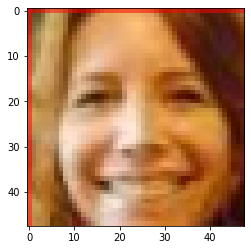

In [31]:
plt.imshow(out_image)

In [95]:
def get_processed_image(path,output_size):
    import cv2

    image=cv2.imread(path)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(image=image,scaleFactor=1.3, minNeighbors=3, minSize=(30, 30))
    
    if len(faces)==0 : return "no face found"
    face=faces[0]
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0),1)
        output_image = image[y:y + h, x:x + w]
    
    output_image=cv2.resize(output_image, dsize=(output_size, output_size), interpolation=cv2.INTER_CUBIC)
    
    return output_image
    
    

In [123]:
from os import listdir

In [80]:
input_path='../raw_data/part1/part1/'
output_size=48

In [122]:
def generate_df(input_path,output_size):
    paths=listdir(input_path)
    images=[]
    ages=[]
    genders=[]
    ethnicities=[]
    index=0
    test=1000

    for path in paths:
        if index>test :        
            print(test)
            test+=1000
        others=path.split('_')
        path=input_path+path
        index+=1
        try:
            image=get_processed_image(path,output_size)
            if not isinstance(image, str):
                images.append(get_processed_image(path,output_size).reshape(output_size*output_size*3).tolist())
                ages.append(others[0])
                genders.append(others[1])
                ethnicities.append(others[2])
        except: pass
        
    dict={
        'age':ages,
        'gender':genders,
        'ethnicity':ethnicities,
        'image':images        
    }
    
    df=pd.DataFrame(data=dict,columns=list(dict.keys()))
    
    return df

In [124]:
input_path='../raw_data/part1/part1/'
df1 = generate_df(input_path,output_size)

1000


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


2000
3000
4000
5000


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


6000
7000
8000


Corrupt JPEG data: bad Huffman code
Corrupt JPEG data: bad Huffman code


9000
10000


In [125]:
input_path='../raw_data/part2/part2/'
df2 = generate_df(input_path,output_size)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [126]:
input_path='../raw_data/part3/part3/'
df3 = generate_df(input_path,output_size)

1000
2000
3000


In [130]:
df1=pd.DataFrame(data=df1,columns=list(df1.keys()))
df2=pd.DataFrame(data=df2,columns=list(df2.keys()))
df3=pd.DataFrame(data=df3,columns=list(df3.keys()))

In [131]:
df_final=pd.concat([df1,df2,df3])

In [132]:
df_final.to_csv('../raw_data/new_data.csv',index=False)

In [6]:
import pandas as pd
import numpy as np

In [3]:
df_final_read=pd.read_csv('../raw_data/new_data.csv')
df_final_read.head()

,age,gender,ethnicity,image
0,62,0.0,0,"[102, 142, 111, 117, 128, 100, 119, 129, 102, ..."
1,4,1.0,0,"[0, 43, 26, 15, 32, 22, 28, 39, 31, 37, 37, 30..."
2,13,1.0,0,"[203, 17, 17, 128, 6, 6, 164, 42, 42, 159, 37,..."
3,34,1.0,0,"[245, 247, 242, 232, 235, 223, 198, 197, 177, ..."
4,58,0.0,0,"[127, 128, 133, 127, 128, 133, 128, 129, 134, ..."


In [4]:
def process_image_new_data(image):
    return np.array(np.array(image)[0]).reshape((48,48,3))

In [5]:
df_final_read['array']=df_final_read['image'].apply(lambda x: np.array(x))

In [6]:
df_final_read['image']=df_final_read['array'].apply(lambda x: np.array(x[1:][:-1].replace(' ','').split(',')).reshape((48,48,3)))

In [7]:
df_final_read['image']=df_final_read['image'].apply(lambda x: np.uint8(x))

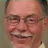

In [8]:
img_test=Image.fromarray(df_final_read['image'][0])
img_test

# Test a model

In [9]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

2022-06-03 16:31:11.963482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ppayet/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-03 16:31:11.963599: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
def pixel_mirroring_3(pixel):
    array=np.uint8(pixel.reshape((48,48,3)))
    img=Image.fromarray(array)
    img=ImageOps.mirror(img)
    img=img.getdata()
    pixel_mirror=np.array(img, dtype=np.float32)
    return np.reshape(pixel_mirror,(48, 48,3))

In [11]:
for items in df_final_read['ethnicity'].unique()[5:]:
    df_final_read = df_final_read.drop(df_final_read[df_final_read.ethnicity==items].index).copy()

In [12]:
df_final_read=df_final_read.dropna()

In [13]:
df_final_read['ethnicity']=df_final_read['ethnicity'].apply(lambda x: int(x))

In [14]:
np.array(df_final_read['image'].tolist()).shape

(20841, 48, 48, 3)

In [23]:
whites=df_final_read[df_final_read['ethnicity']==0]
blacks=df_final_read[df_final_read['ethnicity']==1]
asians=df_final_read[df_final_read['ethnicity']==2]
indians=df_final_read[df_final_read['ethnicity']==3]
hispanics=df_final_read[df_final_read['ethnicity']==4]
hispanics_mirrored=hispanics.copy()
hispanics_mirrored['image']=hispanics_mirrored['image'].apply(pixel_mirroring_3)
blacks_mirrored=blacks.copy()
blacks_mirrored['image']=blacks_mirrored['image'].apply(pixel_mirroring_3)
asians_mirrored=asians.copy()
asians_mirrored['image']=asians_mirrored['image'].apply(pixel_mirroring_3)

In [24]:
np.array(hispanics_mirrored['image'].tolist()).shape

(1527, 48, 48, 3)

In [25]:
np.array(df_final_read['image'].tolist()).shape

(20841, 48, 48, 3)

<AxesSubplot:xlabel='ethnicity', ylabel='count'>

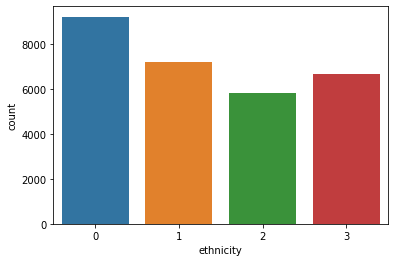

In [26]:
df_final_read=pd.concat([whites, blacks, asians, indians, hispanics, hispanics_mirrored, blacks_mirrored, asians_mirrored])
df_final_read['ethnicity'] = df_final_read['ethnicity'].replace(4,3)
df_final_read[df_final_read['ethnicity']==4]['ethnicity']
sns.countplot(data=df_final_read,x='ethnicity')

In [28]:
del whites, blacks, asians, indians, hispanics, hispanics_mirrored, blacks_mirrored, asians_mirrored

In [37]:
X=np.array(df_final_read['image'].tolist())

In [31]:
y = to_categorical(df_final_read['ethnicity'],num_classes=4)

In [36]:
y.shape

(28862, 4)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
X_train.shape, y_train.shape

((20203, 48, 48, 3), (20203, 4))

In [40]:
def initialize_model():
    
    model = Sequential()
    model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(48,48,3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
#     model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(32,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
#     model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(4, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy','Precision','Recall'])
    
    return model

In [42]:
model = initialize_model()

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 5, 
                   verbose = 1, 
                   restore_best_weights = True)

history = model.fit(X_train,y_train,
                    validation_split=0.2,
                    epochs=50, 
                    batch_size=32,
                    callbacks=[es])

Epoch 1/50


2022-06-03 16:43:28.669113: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 446846976 exceeds 10% of free system memory.


506/506 [==============================] - 79s 153ms/step - loss: 1.5654 - accuracy: 0.3415 - precision: 0.4057 - recall: 0.0319 - val_loss: 1.2592 - val_accuracy: 0.4308 - val_precision: 0.5909 - val_recall: 0.0450
Epoch 2/50
506/506 [==============================] - 76s 150ms/step - loss: 1.2502 - accuracy: 0.4233 - precision: 0.6205 - recall: 0.1267 - val_loss: 1.1167 - val_accuracy: 0.5073 - val_precision: 0.6880 - val_recall: 0.2975
Epoch 3/50
506/506 [==============================] - 76s 151ms/step - loss: 1.1355 - accuracy: 0.4985 - precision: 0.6722 - recall: 0.2526 - val_loss: 1.0266 - val_accuracy: 0.5702 - val_precision: 0.7430 - val_recall: 0.3148
Epoch 4/50
506/506 [==============================] - 76s 149ms/step - loss: 1.0423 - accuracy: 0.5630 - precision: 0.7051 - recall: 0.3485 - val_loss: 0.9696 - val_accuracy: 0.6050 - val_precision: 0.7503 - val_recall: 0.3994
Epoch 5/50
506/506 [==============================] - 75s 149ms/step - loss: 0.9752 - accuracy: 0.5998 

In [43]:
model.evaluate(X_test,y_test)

2022-06-03 17:14:39.030762: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 239404032 exceeds 10% of free system memory.


271/271 [==============================] - 8s 31ms/step - loss: 0.7680 - accuracy: 0.7050 - precision: 0.7791 - recall: 0.6271


[0.7679661512374878,
 0.7050467729568481,
 0.7790530920028687,
 0.6270931959152222]